<a href="https://colab.research.google.com/github/EAName/yelp-reviews/blob/main/Yelp_Combined_Models_RA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import random
import numpy as np
import pickle 
import re,string

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, silhouette_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC

import xgboost as xgb

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_predict


import seaborn as sns
import matplotlib.pyplot as plt

from gensim.models import Word2Vec,LdaMulticore, TfidfModel, CoherenceModel
from gensim import corpora
from gensim import similarities
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import LsiModel,LdaModel

from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, GRU
from keras.callbacks import EarlyStopping
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
from keras import Input

from scipy import sparse

from IPython.display import display

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Load Business Dataset

In [5]:
df_stlouis =pd.read_csv('/content/gdrive/MyDrive/Data/business_df_stlouis.csv')

In [6]:
df_stlouis.shape

(3181, 69)

In [7]:
df_stlouis.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Chicken Wings,Sports Bars,JapaneseTotal,HasTV_NA,RestaurantsPriceRange2_NA,RestaurantsReservations_NA,garage_NA,validated_NA,lot_NA,valet_NA
0,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123.0,38.565165,-90.321087,3.0,19,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ljxNT9p0y7YMPx0fcNBGig,Tony's Restaurant & 3rd Street Cafe,312 Piasa St,Alton,IL,62002.0,38.896563,-90.186203,3.0,94,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1MeIwdbTnZOBFCKOrgaxuw,Ricardo's Italian Cafe,1931 Park Ave,Saint Louis,MO,63104.0,38.617272,-90.212784,3.5,80,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,VrGxoSNZfSiT-G4OqRRGIw,Sunset 44 Bistro,118 W Adams Ave,Saint Louis,MO,63122.0,38.583223,-90.407187,4.0,73,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,wjyUxHxkrvUvCOVqy4g_wg,Oscar's Cafe,7520 Natural Bridge Rd,Normandy,MO,63121.0,38.704765,-90.299811,4.0,11,...,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Load Reviews Dataset

In [8]:
df =pd.read_csv('/content/gdrive/MyDrive/Data/yelp_reviews_clean_version4_st_louis.csv')

In [9]:
df = df.groupby(['business_id'])['text'].apply(lambda x: ','.join(x)).reset_index()

In [10]:
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [11]:
df.head(2)

business_id  \
0  -1wnOZFsvsJPEXh_hWcmMA   
1  -2gmbMDzKgYZ_8DOnJtPyw   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [12]:
def clean_doc(doc): 
    #split review into individual words
    tokens=doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]

    #word lemmzatization    
    lemm = WordNetLemmatizer()
    tokens=[lemm.lemmatize(word) for word in tokens]

    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 3]
    #lowercase all words
    tokens = [word.lower() for word in tokens]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]     

    # filter out common words
    tokens = [w for w in tokens if not w in ['louis', 'restaurant', 'also', 'youre']] 
    # # word stemming    
    # ps=PorterStemmer()
    # tokens=[ps.stem(word) for word in tokens]

    return tokens

def final_processed_text(doc):
    #this is a function to join the processed text back
    ' '.join(doc)
    return doc

In [13]:
df['cleaned_text'] = df['text'].apply(lambda x: clean_doc(x))

final_processed_text = [' '.join(x) for x in df['cleaned_text'].tolist()]
df['final_processed_text'] = final_processed_text     #add to dataframe

In [14]:
df.head(2)

business_id  \
0  -1wnOZFsvsJPEXh_hWcmMA   
1  -2gmbMDzKgYZ_8DOnJtPyw   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [15]:
combined = pd.merge(df, df_stlouis, on ='business_id')

In [16]:
combined.head(2)

business_id  \
0  -1wnOZFsvsJPEXh_hWcmMA   
1  -2gmbMDzKgYZ_8DOnJtPyw   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [17]:
combined.shape

(3181, 72)

In [18]:
combined.drop(["business_id","name","address","city","state","postal_code","latitude",
              "longitude","attributes","categories","BusinessParking","market",'Alcohol_None', 
              'BYOBCorkage_yes_free', 'NoiseLevel_average', 'NoiseLevel_quiet',
              'Smoking_yes', 'WiFi_no', 'Nightlife', 'Bars', 'Sandwiches'], axis =1, inplace = True)

In [19]:
combined = combined.drop(columns = ['RestaurantsTakeOut','BYOBCorkage_yes_corkage', 'RestaurantsAttire_dressy', 'WiFi_paid', 
                                        'validated', 'Italian', 'Mexican', 'Seafood', 'Salad', 'JapaneseTotal', 'garage_NA', 
                                        'validated_NA', 'American (New)'])

In [20]:
combined.shape

(3181, 38)

In [21]:
combined.dtypes

text                          object 
cleaned_text                  object 
final_processed_text          object 
stars                         float64
review_count                  int64  
is_open                       int64  
HasTV                         float64
BusinessAcceptsCreditCards    float64
RestaurantsPriceRange2        float64
RestaurantsReservations       float64
AgesAllowed_21plus            int64  
AgesAllowed_allages           int64  
Alcohol_beer_and_wine         int64  
Alcohol_full_bar              int64  
BYOBCorkage_no                int64  
NoiseLevel_loud               int64  
NoiseLevel_very_loud          int64  
RestaurantsAttire_casual      int64  
RestaurantsAttire_formal      int64  
Smoking_no                    int64  
Smoking_outdoor               int64  
WiFi_free                     int64  
garage                        float64
street                        float64
lot                           float64
valet                         float64
American (Tr

In [22]:
combined['stars'] = combined['stars'].astype('string')

In [23]:
train, test = train_test_split(combined, test_size=0.30, random_state=42)

In [24]:
train.shape

(2226, 38)

In [25]:
test.shape

(955, 38)

In [26]:
y_train = train['stars']
y_test = test['stars']

In [27]:
train.columns

Index(['text', 'cleaned_text', 'final_processed_text', 'stars', 'review_count',
       'is_open', 'HasTV', 'BusinessAcceptsCreditCards',
       'RestaurantsPriceRange2', 'RestaurantsReservations',
       'AgesAllowed_21plus', 'AgesAllowed_allages', 'Alcohol_beer_and_wine',
       'Alcohol_full_bar', 'BYOBCorkage_no', 'NoiseLevel_loud',
       'NoiseLevel_very_loud', 'RestaurantsAttire_casual',
       'RestaurantsAttire_formal', 'Smoking_no', 'Smoking_outdoor',
       'WiFi_free', 'garage', 'street', 'lot', 'valet',
       'American (Traditional)', 'Pizza', 'Breakfast & Brunch', 'ChineseTotal',
       'Burgers', 'Chicken Wings', 'Sports Bars', 'HasTV_NA',
       'RestaurantsPriceRange2_NA', 'RestaurantsReservations_NA', 'lot_NA',
       'valet_NA'],
      dtype='object')

In [28]:
cols = ['review_count',
       'is_open', 'HasTV', 'BusinessAcceptsCreditCards',
       'RestaurantsPriceRange2', 'RestaurantsReservations',
       'AgesAllowed_21plus', 'AgesAllowed_allages', 'Alcohol_beer_and_wine',
       'Alcohol_full_bar', 'BYOBCorkage_no', 'NoiseLevel_loud',
       'NoiseLevel_very_loud', 'RestaurantsAttire_casual',
       'RestaurantsAttire_formal', 'Smoking_no', 'Smoking_outdoor',
       'WiFi_free', 'garage', 'street', 'lot', 'valet',
       'American (Traditional)', 'Pizza', 'Breakfast & Brunch', 'ChineseTotal',
       'Burgers', 'Chicken Wings', 'Sports Bars', 'HasTV_NA',
       'RestaurantsPriceRange2_NA', 'RestaurantsReservations_NA', 'lot_NA',
       'valet_NA']

## Functions

In [29]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    ax.xaxis.set_ticklabels(['1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5'])
    ax.yaxis.set_ticklabels(['1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5'])

In [30]:
def print_validation_report(test_labels, predictions):
    print("Classification Report")
    print(classification_report(test_labels, predictions))
    print('Accuracy Score: {:.3f}'.format(accuracy_score(test_labels, predictions)))
    print('Mean Absolute Error: {:.3f}'.format(mean_absolute_error(test_labels, predictions)))
    print('Root Mean Square Error: {:.3f}'.format(np.sqrt(MSE(test_labels, predictions))))
    print('Mean Square Error: {:.3f}'.format(MSE(test_labels, predictions, squared = True)))

## Logistic Regression Model with TF-IDF

In [ ]:
# 2 gram TF-IDF with max 10,000 words
cv = TfidfVectorizer(ngram_range=(1,2), max_features = 10000)
cv.fit(train['final_processed_text'])
X_train_2tfidf_10000 = cv.transform(train['final_processed_text'])
X_test_2tfidf_10000 = cv.transform(test['final_processed_text'])

In [ ]:
# Add numerical features (business dataset) to sparse matrix
X_train = X_train_2tfidf_10000

for i in cols:
  num_feats_train = train[[i]].values
  X_train = sparse.hstack((X_train, num_feats_train))

In [ ]:
#  Add numerical features (business dataset) to sparse matrix
X_test = X_test_2tfidf_10000

for i in cols:
  num_feats_test = test[[i]].values
  X_test = sparse.hstack((X_test, num_feats_test))

In [ ]:
lr = LogisticRegression(C=1, max_iter= 300)
lr.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=300)

In [ ]:
preds = lr.predict(X_test)

In [ ]:
print(print_validation_report(y_test,preds))

Classification Report
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         1.5       0.00      0.00      0.00        12
         2.0       0.33      0.31      0.32        36
         2.5       0.14      0.02      0.04        83
         3.0       0.26      0.15      0.19       156
         3.5       0.29      0.48      0.36       258
         4.0       0.40      0.45      0.43       264
         4.5       0.42      0.29      0.34       129
         5.0       0.00      0.00      0.00        15

    accuracy                           0.33       955
   macro avg       0.21      0.19      0.19       955
weighted avg       0.31      0.33      0.31       955

Accuracy Score: 0.334
Mean Absolute Error: 0.478
Root Mean Square Error: 0.667
Mean Square Error: 0.445
None


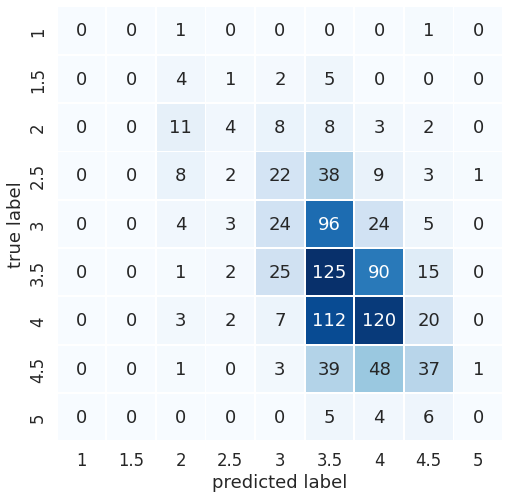

In [ ]:
sns.set(font_scale=1.5)
plot_confusion_matrix(y_test,preds)

In [ ]:
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), lr.coef_[0]
    )
}

for i in range(len(cols)):
  feature_to_coef[cols[i]] = lr.coef_[0][10000 + i]

In [ ]:
positive = sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:30]

In [ ]:
negative = sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1],
    reverse=True)[:30]

In [ ]:
positive_x = []
positive_y = []
for i in positive:
  positive_x.append(i[0])
  positive_y.append(abs(i[1]))

negative_x = []
negative_y = []
for i in negative:
  negative_x.append(i[0])
  negative_y.append(abs(i[1]))

Text(0.5, 0, 'Logistic Regression Coefficient (absolute)')

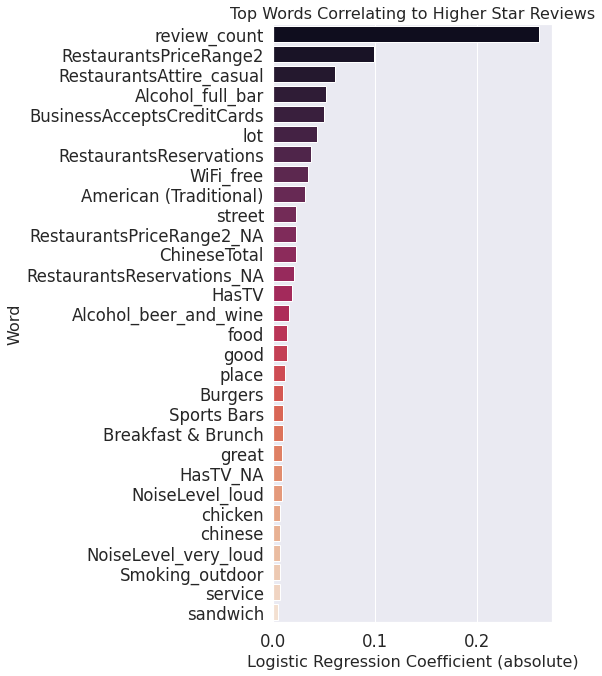

In [ ]:
plt.figure(figsize=(5,11))
sns.barplot(x = positive_y, y =positive_x, palette ="rocket")
plt.title("Top Features Correlating to Higher Star Ratings", fontsize = 16)
plt.ylabel('Features', fontsize=16)
plt.xlabel('Logistic Regression Coefficient (absolute)', fontsize=16)

Text(0.5, 0, 'Logistic Regression Coefficient (absolute)')

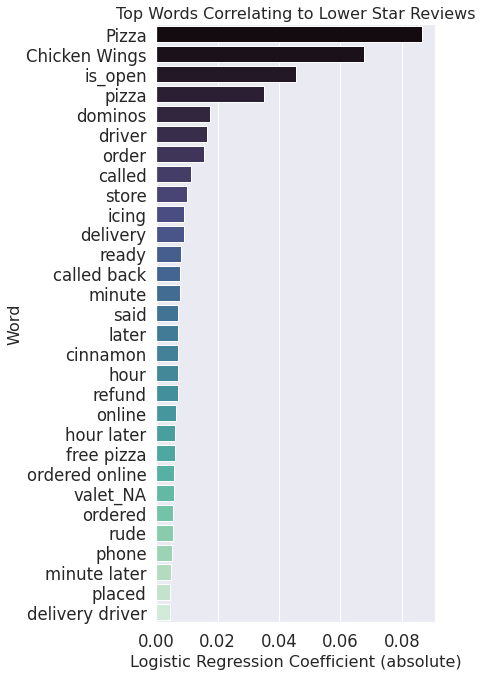

In [ ]:
plt.figure(figsize=(5,11))
sns.barplot(x = negative_y, y =negative_x, palette ='mako')
plt.title("Top Features Correlating to Lower Star Ratings", fontsize = 16)
plt.ylabel('Feature', fontsize=16)
plt.xlabel('Logistic Regression Coefficient (absolute)', fontsize=16)

## Naive Bayes (2 gram TF-IDF vector with 10,000 max words)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
preds = nb.predict(X_test)

In [ ]:
print(print_validation_report(y_test,preds))

Classification Report
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         1.5       0.00      0.00      0.00        12
         2.0       0.00      0.00      0.00        36
         2.5       0.00      0.00      0.00        83
         3.0       0.21      0.47      0.29       156
         3.5       0.31      0.33      0.32       258
         4.0       0.40      0.50      0.44       264
         4.5       0.00      0.00      0.00       129
         5.0       0.00      0.00      0.00        15

    accuracy                           0.30       955
   macro avg       0.10      0.14      0.12       955
weighted avg       0.23      0.30      0.26       955

Accuracy Score: 0.303
Mean Absolute Error: 0.513
Root Mean Square Error: 0.687
Mean Square Error: 0.473
None


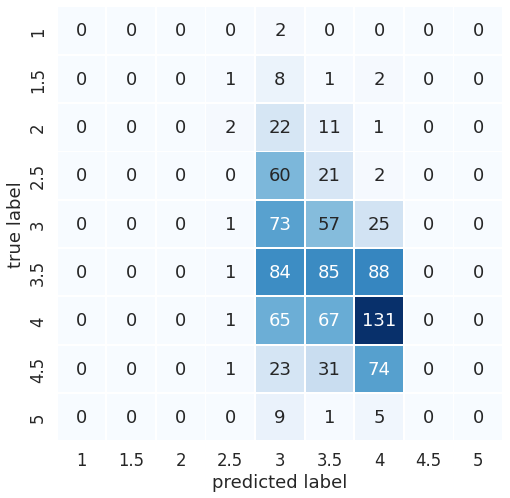

In [ ]:
sns.set(font_scale=1.5)
plot_confusion_matrix(y_test,preds)

## Logistic Regression with 2-gram Count Vector (max 10,000 words)

In [ ]:
# 2 gram count vector with max 10,000 words
cv = CountVectorizer(binary=False, ngram_range = (1,2), max_features = 10000)
cv.fit(train['final_processed_text'])
X_train_2gram_count_10000 = cv.transform(train['final_processed_text'])
X_test_2gram_count_10000 = cv.transform(test['final_processed_text'])

In [ ]:
# Add numerical features (business dataset) to sparse matrix
X_train = X_train_2gram_count_10000

for i in cols:
  num_feats_train = train[[i]].values
  X_train = sparse.hstack((X_train, num_feats_train))

In [ ]:
# Add numerical features (business dataset) to sparse matrix
X_test = X_test_2gram_count_10000

for i in cols:
  num_feats_test = test[[i]].values
  X_test = sparse.hstack((X_test, num_feats_test))

In [ ]:
X_train.shape

(2226, 10034)

In [ ]:
X_test.shape

(955, 10034)

In [ ]:
lr = LogisticRegression(C=1, max_iter= 300)
lr.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=300)

In [ ]:
preds = lr.predict(X_test)

In [ ]:
print(print_validation_report(y_test,preds))

Classification Report
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         1.5       1.00      0.08      0.15        12
         2.0       0.37      0.36      0.37        36
         2.5       0.39      0.39      0.39        83
         3.0       0.44      0.40      0.42       156
         3.5       0.47      0.52      0.49       258
         4.0       0.51      0.50      0.51       264
         4.5       0.52      0.57      0.54       129
         5.0       0.10      0.07      0.08        15

    accuracy                           0.47       955
   macro avg       0.42      0.32      0.33       955
weighted avg       0.47      0.47      0.47       955

Accuracy Score: 0.471
Mean Absolute Error: 0.316
Root Mean Square Error: 0.467
Mean Square Error: 0.218
None


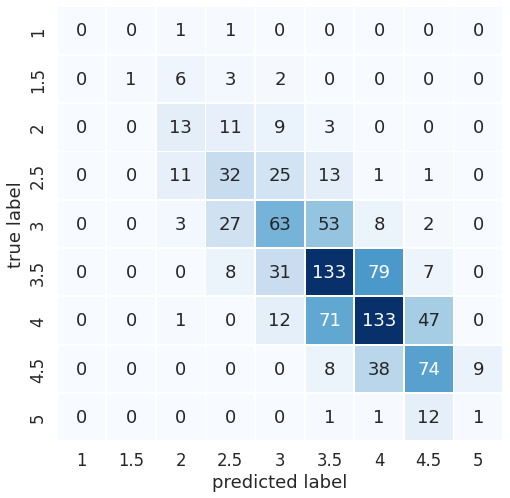

In [ ]:
sns.set(font_scale=1.5)
plot_confusion_matrix(y_test,preds)

In [ ]:
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), lr.coef_[0]
    )
}

# add coefficient of business dataset features to dictionary
for i in range(len(cols)):
  words = X_train.shape[1] - len(cols) # number of words in word matrix
  feature_to_coef[cols[i]] = lr.coef_[0][words + i]

In [ ]:
X_train.shape[1]

10000

In [ ]:
positive = sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:30]

In [ ]:
negative = sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1],
    reverse=True)[:30]

In [ ]:
positive_x = []
positive_y = []
for i in positive:
  positive_x.append(i[0])
  positive_y.append(abs(i[1]))

negative_x = []
negative_y = []
for i in negative:
  negative_x.append(i[0])
  negative_y.append(abs(i[1]))

Text(0.5, 0, 'Logistic Regression Coefficient (absolute)')

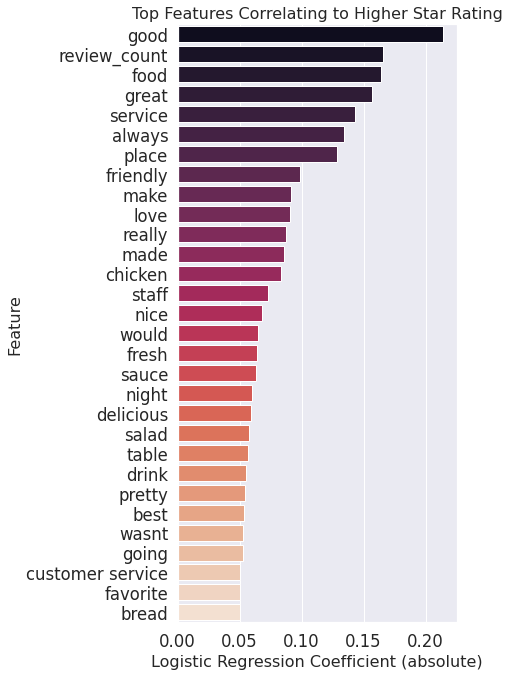

In [ ]:
plt.figure(figsize=(5,11))
sns.barplot(x = positive_y, y =positive_x, palette ="rocket")
plt.title("Top Features Correlating to Higher Star Rating", fontsize = 16)
plt.ylabel('Feature', fontsize=16)
plt.xlabel('Logistic Regression Coefficient (absolute)', fontsize=16)

Text(0.5, 0, 'Logistic Regression Coefficient (absolute)')

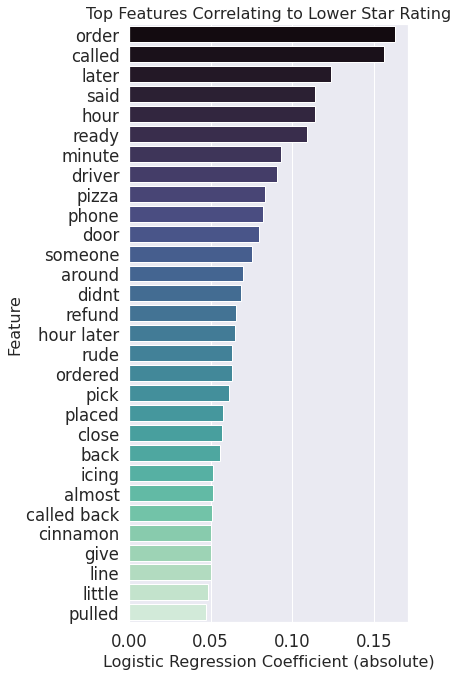

In [ ]:
plt.figure(figsize=(5,11))
sns.barplot(x = negative_y, y =negative_x, palette ='mako')
plt.title("Top Features Correlating to Lower Star Rating", fontsize = 16)
plt.ylabel('Feature', fontsize=16)
plt.xlabel('Logistic Regression Coefficient (absolute)', fontsize=16)

In [ ]:
# Hyperparameter tuning

for c in [0.01, 0.05, 0.25, 0.5, 1]:
  lr = LogisticRegression(C=c, max_iter= 300)
  lr.fit(X_train, y_train)
  preds = lr.predict(X_test)
  print("For C = %s" % (c))
  print(print_validation_report(y_test,preds), '\n')

For C = 0.01
Classification Report
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         1.5       0.00      0.00      0.00        12
         2.0       0.35      0.33      0.34        36
         2.5       0.36      0.31      0.34        83
         3.0       0.42      0.38      0.40       156
         3.5       0.48      0.59      0.53       258
         4.0       0.52      0.49      0.51       264
         4.5       0.55      0.57      0.56       129
         5.0       0.09      0.07      0.08        15

    accuracy                           0.47       955
   macro avg       0.31      0.30      0.30       955
weighted avg       0.46      0.47      0.47       955

Accuracy Score: 0.473
Mean Absolute Error: 0.305
Root Mean Square Error: 0.447
Mean Square Error: 0.199
None 

For C = 0.05
Classification Report
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
     

## Naive Bayes (2 gram count vector with 10,000 max words)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
preds = nb.predict(X_test)

In [ ]:
print(print_validation_report(y_test,preds))

Classification Report
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         1.5       0.00      0.00      0.00        12
         2.0       0.28      0.61      0.38        36
         2.5       0.32      0.36      0.34        83
         3.0       0.35      0.37      0.36       156
         3.5       0.38      0.45      0.41       258
         4.0       0.48      0.32      0.39       264
         4.5       0.40      0.34      0.37       129
         5.0       0.07      0.13      0.09        15

    accuracy                           0.37       955
   macro avg       0.25      0.29      0.26       955
weighted avg       0.39      0.37      0.37       955

Accuracy Score: 0.373
Mean Absolute Error: 0.403
Root Mean Square Error: 0.560
Mean Square Error: 0.313
None


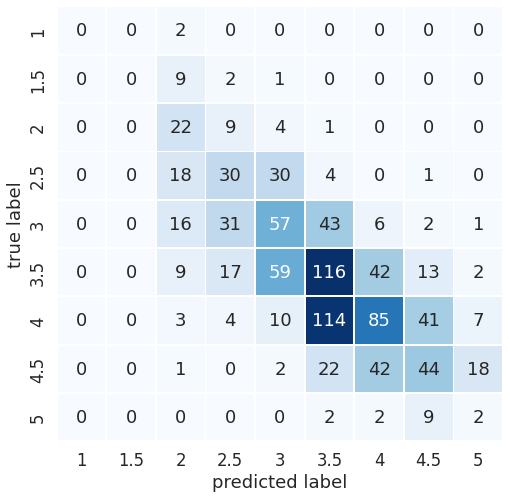

In [ ]:
sns.set(font_scale=1.5)
plot_confusion_matrix(y_test,preds)

## Random Forest (2 gram count vector with 10,000 max words)

In [ ]:
rf = RandomForestClassifier(max_features = 'sqrt')
rf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt')

In [ ]:
preds = rf.predict(X_test)

In [ ]:
print(print_validation_report(y_test,preds))

Classification Report
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         1.5       0.00      0.00      0.00        12
         2.0       0.50      0.06      0.10        36
         2.5       0.44      0.10      0.16        83
         3.0       0.22      0.15      0.18       156
         3.5       0.40      0.74      0.52       258
         4.0       0.49      0.54      0.52       264
         4.5       0.66      0.30      0.41       129
         5.0       0.00      0.00      0.00        15

    accuracy                           0.43       955
   macro avg       0.30      0.21      0.21       955
weighted avg       0.43      0.43      0.38       955

Accuracy Score: 0.425
Mean Absolute Error: 0.370
Root Mean Square Error: 0.537
Mean Square Error: 0.288
None


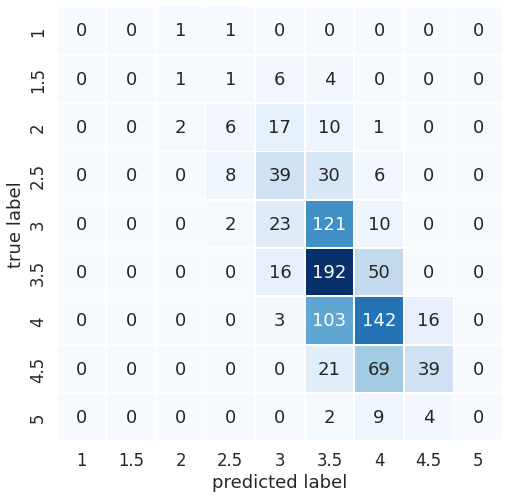

In [ ]:
sns.set(font_scale=1.5)
plot_confusion_matrix(y_test,preds)

In [ ]:
%%time
rfc = RandomForestClassifier(random_state=5, n_jobs=-1)

parameters_rfc = {'n_estimators': [10, 50, 200], 
                  #  'max_leaf_nodes': 16,
                  'max_features': ['auto', 'sqrt', 'log2'], 
                  'max_depth': [16, 32, 50], 
                  'criterion': ['gini', 'entropy']}

gscv_rfc = GridSearchCV(rfc, parameters_rfc, cv=3, scoring='accuracy', verbose=1)

gscv_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
CPU times: user 1min 29s, sys: 4.91 s, total: 1min 34s
Wall time: 6min 29s


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [16, 32, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
print('Best accuracy:', gscv_rfc.best_score_)
print('Best parameters:', gscv_rfc.best_params_)

Best accuracy: 0.41554357592093444
Best parameters: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 200}


In [ ]:
preds = gscv_rfc.predict(X_test)

In [ ]:
print(print_validation_report(y_test,preds))

Classification Report
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         1.5       0.00      0.00      0.00        12
         2.0       0.00      0.00      0.00        36
         2.5       0.28      0.06      0.10        83
         3.0       0.30      0.19      0.24       156
         3.5       0.40      0.79      0.54       258
         4.0       0.52      0.54      0.53       264
         4.5       0.78      0.33      0.46       129
         5.0       0.00      0.00      0.00        15

    accuracy                           0.44       955
   macro avg       0.25      0.21      0.21       955
weighted avg       0.43      0.44      0.40       955

Accuracy Score: 0.444
Mean Absolute Error: 0.359
Root Mean Square Error: 0.530
Mean Square Error: 0.281
None


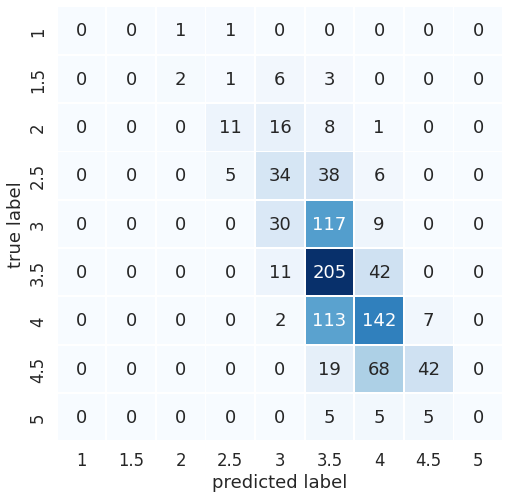

In [ ]:
sns.set(font_scale=1.5)
plot_confusion_matrix(y_test,preds)

##XGBoost (2 gram count vector with 10,000 max words)

In [ ]:
%%time
xgbc = xgb.XGBClassifier(random_state=5, eval_metric='logloss', n_estimators = 200, max_depth = 32, learning_rate = 0.3)
xgbc.fit(X_train, y_train)

CPU times: user 4min 45s, sys: 206 ms, total: 4min 45s
Wall time: 4min 48s


XGBClassifier(eval_metric='logloss', learning_rate=0.3, max_depth=32,
              n_estimators=200, objective='multi:softprob', random_state=5)

In [ ]:
preds = xgbc.predict(X_train)

In [ ]:
# training accuracy
print(print_validation_report(y_train,preds))

Classification Report
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         3
         1.5       1.00      1.00      1.00        19
         2.0       1.00      1.00      1.00        78
         2.5       1.00      1.00      1.00       184
         3.0       1.00      1.00      1.00       390
         3.5       1.00      1.00      1.00       615
         4.0       1.00      1.00      1.00       555
         4.5       1.00      1.00      1.00       333
         5.0       1.00      1.00      1.00        49

    accuracy                           1.00      2226
   macro avg       1.00      1.00      1.00      2226
weighted avg       1.00      1.00      1.00      2226

Accuracy Score: 1.000
Mean Absolute Error: 0.000
Root Mean Square Error: 0.000
Mean Square Error: 0.000
None


In [ ]:
preds = xgbc.predict(X_test)

In [ ]:
print(print_validation_report(y_test,preds))

Classification Report
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         1.5       0.00      0.00      0.00        12
         2.0       0.58      0.19      0.29        36
         2.5       0.26      0.14      0.19        83
         3.0       0.31      0.33      0.32       156
         3.5       0.42      0.57      0.49       258
         4.0       0.48      0.49      0.49       264
         4.5       0.62      0.53      0.57       129
         5.0       0.00      0.00      0.00        15

    accuracy                           0.44       955
   macro avg       0.30      0.25      0.26       955
weighted avg       0.43      0.44      0.42       955

Accuracy Score: 0.436
Mean Absolute Error: 0.351
Root Mean Square Error: 0.505
Mean Square Error: 0.255
None


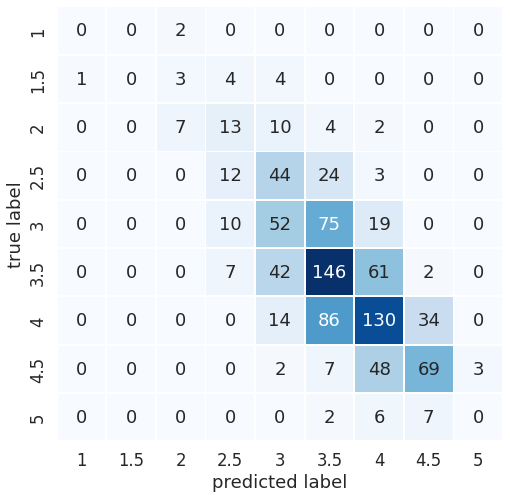

In [ ]:
sns.set(font_scale=1.5)
plot_confusion_matrix(y_test,preds)

In [ ]:
%%time
xgbc = xgb.XGBClassifier(random_state=5, eval_metric='logloss')

parameters_xgbc = {'n_estimators': [10, 50, 200],
                  'max_depth': [16, 32, 50],
                  'learning_rate': [0.1]} # 0.01, 0.05, 

gscv_xgbc = GridSearchCV(xgbc, parameters_xgbc, cv=3, scoring='accuracy', return_train_score=True, verbose=1)

gscv_xgbc.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
CPU times: user 1h 12min 16s, sys: 4.52 s, total: 1h 12min 20s
Wall time: 1h 12min 2s


GridSearchCV(cv=3,
             estimator=XGBClassifier(eval_metric='logloss', random_state=5),
             param_grid={'learning_rate': [0.1], 'max_depth': [16, 32, 50],
                         'n_estimators': [10, 50, 200]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
print('Best accuracy:', gscv_xgbc.best_score_)
print('Best parameters:', gscv_xgbc.best_params_)

# not better than RF and took much longer. Probably because data is sparse

Best accuracy: 0.41554357592093444
Best parameters: {'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 200}


In [ ]:
preds = gscv_xgbc.predict(X_test)

In [ ]:
print(print_validation_report(y_test,preds))

Classification Report
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         1.5       0.00      0.00      0.00        12
         2.0       0.62      0.22      0.33        36
         2.5       0.33      0.18      0.23        83
         3.0       0.34      0.35      0.35       156
         3.5       0.44      0.59      0.50       258
         4.0       0.51      0.53      0.52       264
         4.5       0.58      0.51      0.54       129
         5.0       0.00      0.00      0.00        15

    accuracy                           0.46       955
   macro avg       0.31      0.27      0.28       955
weighted avg       0.45      0.46      0.44       955

Accuracy Score: 0.457
Mean Absolute Error: 0.334
Root Mean Square Error: 0.487
Mean Square Error: 0.237
None


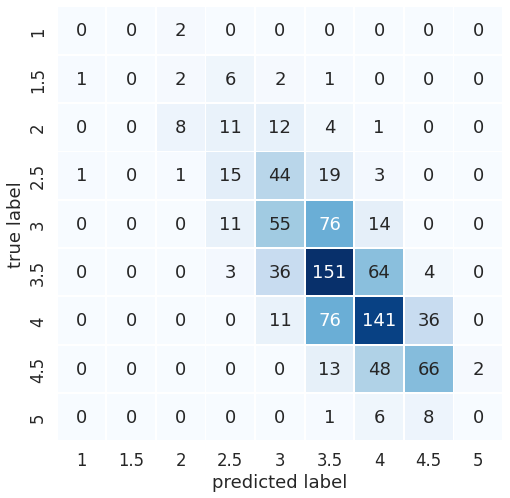

In [ ]:
sns.set(font_scale=1.5)
plot_confusion_matrix(y_test,preds)

## Logistic Regression with 2-gram Count Vector (max 20,000 words) SMOTE

In [31]:
# 2 gram count vector with max 20,000 words
cv = CountVectorizer(binary=False, ngram_range = (1,2), max_features = 20000)
cv.fit(train['final_processed_text'])
X_train_2gram_count_20000 = cv.transform(train['final_processed_text'])
X_test_2gram_count_20000 = cv.transform(test['final_processed_text'])

In [32]:
# Add numerical features (business dataset) to sparse matrix
X_train = X_train_2gram_count_20000

for i in cols:
  num_feats_train = train[[i]].values
  X_train = sparse.hstack((X_train, num_feats_train))

In [33]:
# Add numerical features (business dataset) to sparse matrix
X_test = X_test_2gram_count_20000

for i in cols:
  num_feats_test = test[[i]].values
  X_test = sparse.hstack((X_test, num_feats_test))

In [36]:
from imblearn.over_sampling import SMOTE

In [39]:
oversample=SMOTE(k_neighbors=2)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [41]:
%%time
lr = LogisticRegression(max_iter= 300, random_state = 10)

parameters_lr = {'C': [0.01, 1]}

gscv_lr = GridSearchCV(lr, parameters_lr, cv=3, scoring='accuracy', verbose=1)

gscv_lr.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
CPU times: user 10min 17s, sys: 7min 34s, total: 17min 52s
Wall time: 9min 36s


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=300, random_state=10),
             param_grid={'C': [0.01, 1]}, scoring='accuracy', verbose=1)

In [42]:
print('Best accuracy:', gscv_lr.best_score_)
print('Best parameters:', gscv_lr.best_params_)

Best accuracy: 0.8588979223125565
Best parameters: {'C': 1}


In [54]:
preds = gscv_lr.predict(X_test)

In [44]:
print(print_validation_report(y_test,preds))

Classification Report
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         1.5       0.17      0.08      0.11        12
         2.0       0.32      0.44      0.37        36
         2.5       0.38      0.33      0.35        83
         3.0       0.42      0.38      0.40       156
         3.5       0.48      0.52      0.50       258
         4.0       0.54      0.52      0.53       264
         4.5       0.54      0.57      0.55       129
         5.0       0.05      0.07      0.06        15

    accuracy                           0.47       955
   macro avg       0.32      0.32      0.32       955
weighted avg       0.47      0.47      0.47       955

Accuracy Score: 0.469
Mean Absolute Error: 0.323
Root Mean Square Error: 0.482
Mean Square Error: 0.232
None


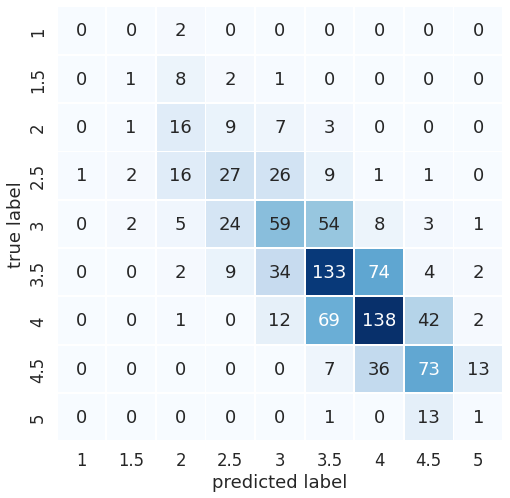

In [55]:
sns.set(font_scale=1.5)
plot_confusion_matrix(y_test,preds)

In [58]:
y_train.value_counts()

3.5    615
4.0    555
3.0    390
4.5    333
2.5    184
2.0    78 
5.0    49 
1.5    19 
1.0    3  
Name: stars, dtype: Int64

### Specifying number of samples in each class

In [61]:
strategy = {'3.5':615, '4.0':555,'3.0':390, '4.5': 333, '2.5':184, '2.0':150,'5.0':150, '1.5':100,'1.0':100}
oversample=SMOTE(sampling_strategy = strategy, k_neighbors=2)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [62]:
%%time
lr = LogisticRegression(max_iter= 300, random_state = 10)

parameters_lr = {'C': [0.01, 1]}

gscv_lr = GridSearchCV(lr, parameters_lr, cv=3, scoring='accuracy', verbose=1)

gscv_lr.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
CPU times: user 5min 35s, sys: 4min 7s, total: 9min 42s
Wall time: 5min 7s


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=300, random_state=10),
             param_grid={'C': [0.01, 1]}, scoring='accuracy', verbose=1)

In [63]:
print('Best accuracy:', gscv_lr.best_score_)
print('Best parameters:', gscv_lr.best_params_)

Best accuracy: 0.5789677920062087
Best parameters: {'C': 0.01}


In [64]:
preds = gscv_lr.predict(X_test)

In [65]:
print(print_validation_report(y_test,preds))

Classification Report
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         1.5       0.25      0.08      0.12        12
         2.0       0.39      0.39      0.39        36
         2.5       0.38      0.30      0.34        83
         3.0       0.42      0.38      0.40       156
         3.5       0.49      0.59      0.54       258
         4.0       0.54      0.52      0.53       264
         4.5       0.56      0.57      0.57       129
         5.0       0.08      0.07      0.07        15

    accuracy                           0.49       955
   macro avg       0.35      0.32      0.33       955
weighted avg       0.48      0.49      0.48       955

Accuracy Score: 0.486
Mean Absolute Error: 0.297
Root Mean Square Error: 0.442
Mean Square Error: 0.195
None


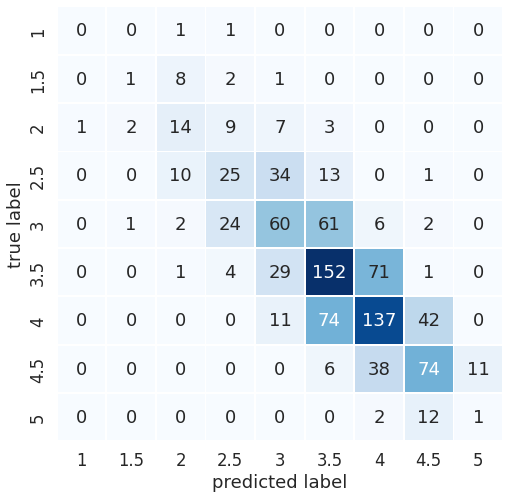

In [66]:
sns.set(font_scale=1.5)
plot_confusion_matrix(y_test,preds)

## Logistic Regression with 2-gram Count Vector (max 20,000 words)

In [ ]:
# 2 gram count vector with max 20,000 words
cv = CountVectorizer(binary=False, ngram_range = (1,2), max_features = 20000)
cv.fit(train['final_processed_text'])
X_train_2gram_count_20000 = cv.transform(train['final_processed_text'])
X_test_2gram_count_20000 = cv.transform(test['final_processed_text'])

In [ ]:
# Add numerical features (business dataset) to sparse matrix
X_train = X_train_2gram_count_20000

for i in cols:
  num_feats_train = train[[i]].values
  X_train = sparse.hstack((X_train, num_feats_train))

In [ ]:
# Add numerical features (business dataset) to sparse matrix
X_test = X_test_2gram_count_20000

for i in cols:
  num_feats_test = test[[i]].values
  X_test = sparse.hstack((X_test, num_feats_test))

In [ ]:
%%time
lr = LogisticRegression(max_iter= 300, random_state = 10)

parameters_lr = {'C': [0.01, 0.05, 0.25, 0.5, 1]}

gscv_lr = GridSearchCV(lr, parameters_lr, cv=3, scoring='accuracy', verbose=1)

gscv_lr.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
CPU times: user 12min 12s, sys: 8min 57s, total: 21min 10s
Wall time: 11min 39s


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=300, random_state=10),
             param_grid={'C': [0.01, 0.05, 0.25, 0.5, 1]}, scoring='accuracy',
             verbose=1)

In [ ]:
print('Best accuracy:', gscv_lr.best_score_)
print('Best parameters:', gscv_lr.best_params_)

Best accuracy: 0.477088948787062
Best parameters: {'C': 0.01}


In [ ]:
preds = gscv_lr.predict(X_test)

In [ ]:
print(print_validation_report(y_test,preds))

Classification Report
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         1.5       0.00      0.00      0.00        12
         2.0       0.38      0.33      0.35        36
         2.5       0.39      0.33      0.36        83
         3.0       0.42      0.39      0.40       156
         3.5       0.49      0.59      0.54       258
         4.0       0.54      0.52      0.53       264
         4.5       0.57      0.59      0.58       129
         5.0       0.12      0.07      0.09        15

    accuracy                           0.49       955
   macro avg       0.32      0.31      0.32       955
weighted avg       0.48      0.49      0.48       955

Accuracy Score: 0.488
Mean Absolute Error: 0.296
Root Mean Square Error: 0.440
Mean Square Error: 0.193
None


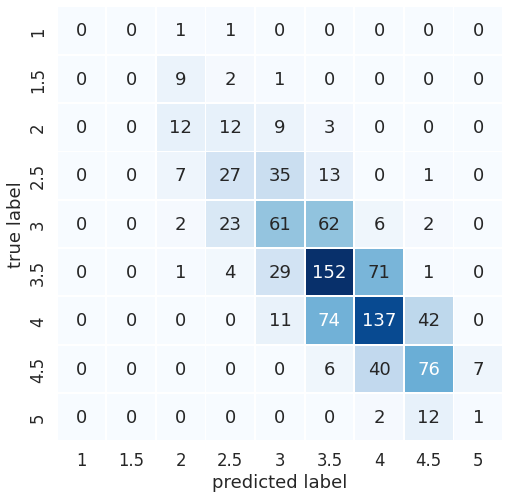

In [ ]:
sns.set(font_scale=1.5)
plot_confusion_matrix(y_test,preds)

In [ ]:
lr = LogisticRegression(C=0.01, max_iter= 300)
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=300)

In [ ]:
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), lr.coef_[0]
    )
}

# add coefficient of business dataset features to dictionary
for i in range(len(cols)):
  words = X_train.shape[1] - len(cols) # number of words in word matrix
  feature_to_coef[cols[i]] = lr.coef_[0][words + i]

In [ ]:
positive = sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:30]

In [ ]:
negative = sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1],
    reverse=True)[:30]

In [ ]:
positive_x = []
positive_y = []
for i in positive:
  positive_x.append(i[0])
  positive_y.append(abs(i[1]))

negative_x = []
negative_y = []
for i in negative:
  negative_x.append(i[0])
  negative_y.append(abs(i[1]))

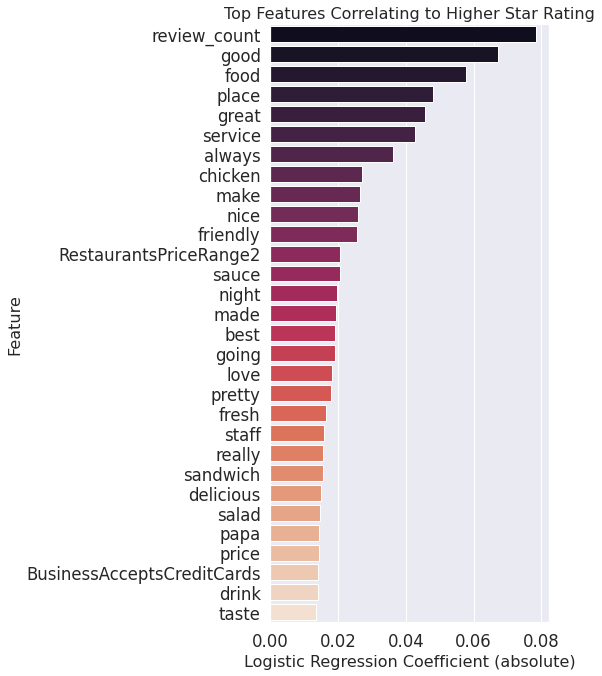

In [ ]:
plt.figure(figsize=(5,11))
sns.barplot(x = positive_y, y =positive_x, palette ="rocket")
plt.title("Top Features Correlating to Higher Star Rating", fontsize = 16)
plt.ylabel('Feature', fontsize=16)
plt.xlabel('Logistic Regression Coefficient (absolute)', fontsize=16)

Text(0.5, 0, 'Logistic Regression Coefficient (absolute)')

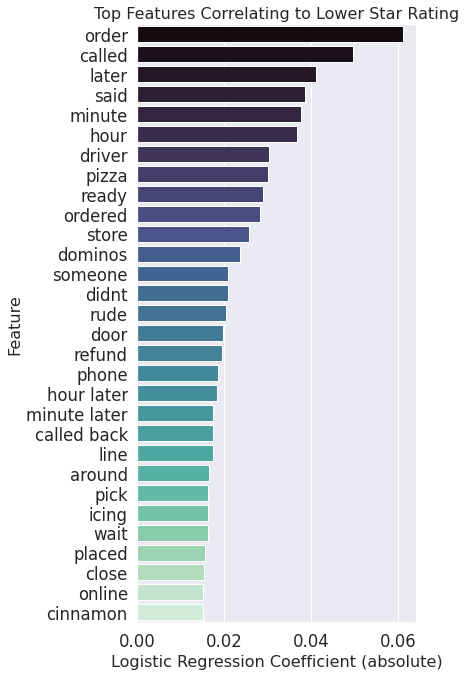

In [ ]:
plt.figure(figsize=(5,11))
sns.barplot(x = negative_y, y =negative_x, palette ='mako')
plt.title("Top Features Correlating to Lower Star Rating", fontsize = 16)
plt.ylabel('Feature', fontsize=16)
plt.xlabel('Logistic Regression Coefficient (absolute)', fontsize=16)

## Naive Bayes (2 gram count vector with 20,000 max words)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
preds = nb.predict(X_test)

In [ ]:
print(print_validation_report(y_test,preds))

Classification Report
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         1.5       0.00      0.00      0.00        12
         2.0       0.28      0.56      0.37        36
         2.5       0.33      0.36      0.34        83
         3.0       0.35      0.36      0.35       156
         3.5       0.37      0.43      0.40       258
         4.0       0.47      0.34      0.39       264
         4.5       0.41      0.35      0.38       129
         5.0       0.08      0.13      0.10        15

    accuracy                           0.37       955
   macro avg       0.25      0.28      0.26       955
weighted avg       0.38      0.37      0.37       955

Accuracy Score: 0.371
Mean Absolute Error: 0.397
Root Mean Square Error: 0.546
Mean Square Error: 0.298
None


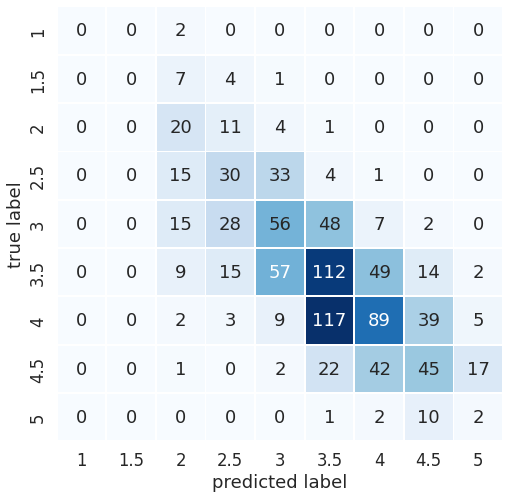

In [ ]:
sns.set(font_scale=1.5)
plot_confusion_matrix(y_test,preds)